In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\appuv\Desktop\b\adidas_dataset_1200rows.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        1200 non-null   int64  
 1   Order_Date      1200 non-null   object 
 2   SKU             1200 non-null   object 
 3   Product_Name    1200 non-null   object 
 4   Category        1200 non-null   object 
 5   Region          1200 non-null   object 
 6   Store_Type      1200 non-null   object 
 7   Units_Sold      1200 non-null   int64  
 8   Unit_Price      1200 non-null   float64
 9   Discount        1200 non-null   int64  
 10  Revenue         1200 non-null   float64
 11  Profit          1200 non-null   float64
 12  Customer_Age    1200 non-null   int64  
 13  Gender          1200 non-null   object 
 14  Payment_Method  1200 non-null   object 
dtypes: float64(3), int64(4), object(8)
memory usage: 140.8+ KB


In [27]:
(df.columns)

Index(['Order_ID', 'Order_Date', 'SKU', 'Product_Name', 'Category', 'Region',
       'Store_Type', 'Units_Sold', 'Unit_Price', 'Discount', 'Revenue',
       'Profit', 'Customer_Age', 'Gender', 'Payment_Method'],
      dtype='object')

In [2]:
df.describe()

,Order_ID,Units_Sold,Unit_Price,Discount,Revenue,Profit,Customer_Age
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,100599.500000,2.958333,86.078967,5.841667,239.481600,70.891542,29.640833
std,346.554469,1.314548,59.756635,8.557314,209.691529,62.379234,7.844411
min,100000.000000,1.000000,12.000000,0.000000,12.190000,3.030000,16.000000
25%,100299.750000,2.000000,31.967500,0.000000,77.112500,23.157500,24.000000
50%,100599.500000,3.000000,72.700000,5.000000,169.845000,49.715000,29.000000
75%,100899.250000,4.000000,133.655000,10.000000,352.515000,102.832500,35.000000
max,101199.000000,7.000000,252.890000,40.000000,1526.110000,393.250000,54.000000


In [28]:
df.columns.str.lower()

Index(['order_id', 'order_date', 'sku', 'product_name', 'category', 'region',
       'store_type', 'units_sold', 'unit_price', 'discount', 'revenue',
       'profit', 'customer_age', 'gender', 'payment_method'],
      dtype='object')

In [29]:
df.head(5)

,Order_ID,Order_Date,SKU,Product_Name,Category,Region,Store_Type,Units_Sold,Unit_Price,Discount,Revenue,Profit,Customer_Age,Gender,Payment_Method
0,101178,2024-09-21,AD-1877-D,Tiro 23 Track Pants,Apparel,Asia-Pacific,Online,5,49.68,0,248.40,70.40,35,Female,NetBanking
1,100865,2024-09-04,AD-1745-B,Essentials Tee,Apparel,Europe,Online,2,27.07,0,54.14,11.35,48,Female,NetBanking
2,100101,2024-09-24,AD-8110-A,Superstar,Footwear,Asia-Pacific,Online,3,96.58,20,231.79,61.86,34,Male,Debit Card
3,100439,2024-01-03,AD-4892-C,Performance Socks (3-pack),Accessories,Latin America,Retail,5,17.49,10,78.70,35.99,30,Female,Apple Pay
4,100058,2023-10-07,AD-8657-B,Originals Backpack,Accessories,Europe,Retail,3,58.96,5,168.04,68.38,30,Female,PayPal


In [30]:
df.isnull().sum

<bound method DataFrame.sum of       Order_ID  Order_Date    SKU  Product_Name  Category  Region  Store_Type  \
0        False       False  False         False     False   False       False   
1        False       False  False         False     False   False       False   
2        False       False  False         False     False   False       False   
3        False       False  False         False     False   False       False   
4        False       False  False         False     False   False       False   
...        ...         ...    ...           ...       ...     ...         ...   
1195     False       False  False         False     False   False       False   
1196     False       False  False         False     False   False       False   
1197     False       False  False         False     False   False       False   
1198     False       False  False         False     False   False       False   
1199     False       False  False         False     False   False       False 


Best alpha from CV: 1.0

Mean Squared Error: 281.5435729771021
R2 Score: 0.922082293957234
Ridge regression coefficients: [-0.50203043  1.45522903  2.74553871 -1.10883287 56.98098213 -0.42596934]


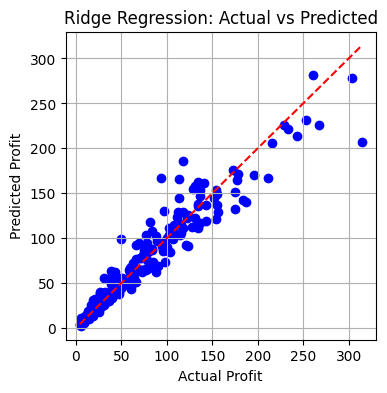

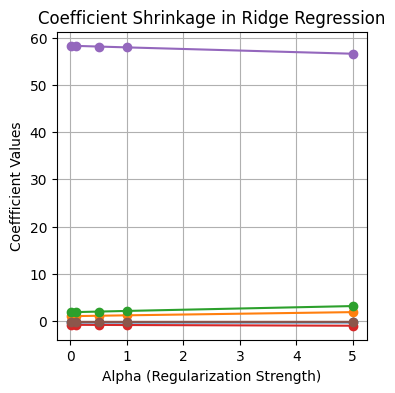


Ridge Coefficient (with best alpha):
Revenue         56.980982
Unit_Price       2.745539
Units_Sold       1.455229
Customer_Age    -0.425969
Order_ID        -0.502030
Discount        -1.108833
dtype: float64


In [31]:
#Predicting Total Profit of Addidas using ridge regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(r"C:\Users\appuv\Desktop\b\adidas_dataset_1200rows.csv")
numeric_features = df.select_dtypes(include=[np.number])
x = numeric_features.drop('Profit', axis=1)
y = numeric_features['Profit']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

alphas = [0.01, 0.1, 0.5, 1, 5] 
ridge_cv = RidgeCV(alphas=alphas, cv=2)
ridge_cv.fit(x_train, y_train)

best_alpha = ridge_cv.alpha_
print(f"\nBest alpha from CV: {best_alpha}")
ridge = RidgeCV(alphas=alphas, cv=2)
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)
print("\nMean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Ridge regression coefficients:", ridge.coef_)

plt.figure(figsize=(4,4)) 
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Ridge Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

#coefficient shrinkage visuallization
coefs = []
for a in alphas:
    ridge_temp = Ridge(alpha=a)
    ridge_temp.fit(x_scaled, y)
    coefs.append(ridge_temp.coef_)
coefs = np.array(coefs)
plt.figure(figsize=(4,4))
plt.plot(alphas, coefs, marker='o')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coeffficient Values')
plt.title('Coefficient Shrinkage in Ridge Regression')
plt.grid(True)
plt.show()

coef_df = pd.Series(ridge.coef_, index=x.columns)
print("\nRidge Coefficient (with best alpha):")
print(coef_df.sort_values(ascending=False).head(10))


Accuracy: 0.8166666666666667

Confusion Matrix:
 [[48  0  0  0  0  0  0]
 [ 3 93  4  0  0  0  0]
 [ 0  8 87  5  0  0  0]
 [ 0  1 14 48  5  0  0]
 [ 0  0  0 12 16  0  0]
 [ 0  0  0  2  7  2  0]
 [ 0  0  0  4  1  0  0]]

classification Report:
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        48
           2       0.91      0.93      0.92       100
           3       0.83      0.87      0.85       100
           4       0.68      0.71      0.69        68
           5       0.55      0.57      0.56        28
           6       1.00      0.18      0.31        11
           7       0.00      0.00      0.00         5

    accuracy                           0.82       360
   macro avg       0.70      0.61      0.61       360
weighted avg       0.81      0.82      0.80       360

OOB Score: 0.7523809523809524


C:\Users\appuv\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\appuv\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\appuv\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

cross Validation Score(Mean): 0.8016666666666665


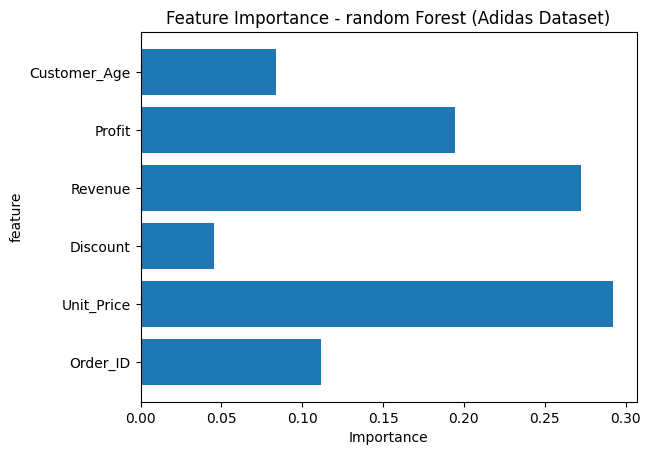

In [1]:
#random forest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv(r"C:\Users\appuv\Desktop\b\adidas_dataset_1200rows.csv")
numeric_features = df.select_dtypes(include=[np.number])
x = numeric_features.drop('Units_Sold', axis=1)
y = numeric_features['Units_Sold']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(
    n_estimators=100,  
    oob_score=True,    
    random_state=42
) 
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nclassification Report:\n", classification_report(y_test, y_pred))
print("OOB Score:", model.oob_score_)


cv_score  = cross_val_score(model, x, y, cv=5)
print("cross Validation Score(Mean):", cv_score.mean())

#feature importance plot
importances = model.feature_importances_
features = x.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.ylabel("feature")
plt.title("Feature Importance - random Forest (Adidas Dataset)")
plt.show()
      

Importing plotly failed. Interactive plots will not work.
09:46:04 - cmdstanpy - INFO - Chain [1] start processing
09:46:05 - cmdstanpy - INFO - Chain [1] done processing


Orginal DataFrame:
   Order_ID         ds        SKU                Product_Name     Category  \
0    101178 2024-09-21  AD-1877-D         Tiro 23 Track Pants      Apparel   
1    100865 2024-09-04  AD-1745-B              Essentials Tee      Apparel   
2    100101 2024-09-24  AD-8110-A                   Superstar     Footwear   
3    100439 2024-01-03  AD-4892-C  Performance Socks (3-pack)  Accessories   
4    100058 2023-10-07  AD-8657-B          Originals Backpack  Accessories   

          Region Store_Type  Units_Sold  Unit_Price  Discount  Revenue      y  \
0   Asia-Pacific     Online           5       49.68         0   248.40  70.40   
1         Europe     Online           2       27.07         0    54.14  11.35   
2   Asia-Pacific     Online           3       96.58        20   231.79  61.86   
3  Latin America     Retail           5       17.49        10    78.70  35.99   
4         Europe     Retail           3       58.96         5   168.04  68.38   

   Customer_Age  Gender P

<Figure size 500x400 with 0 Axes>

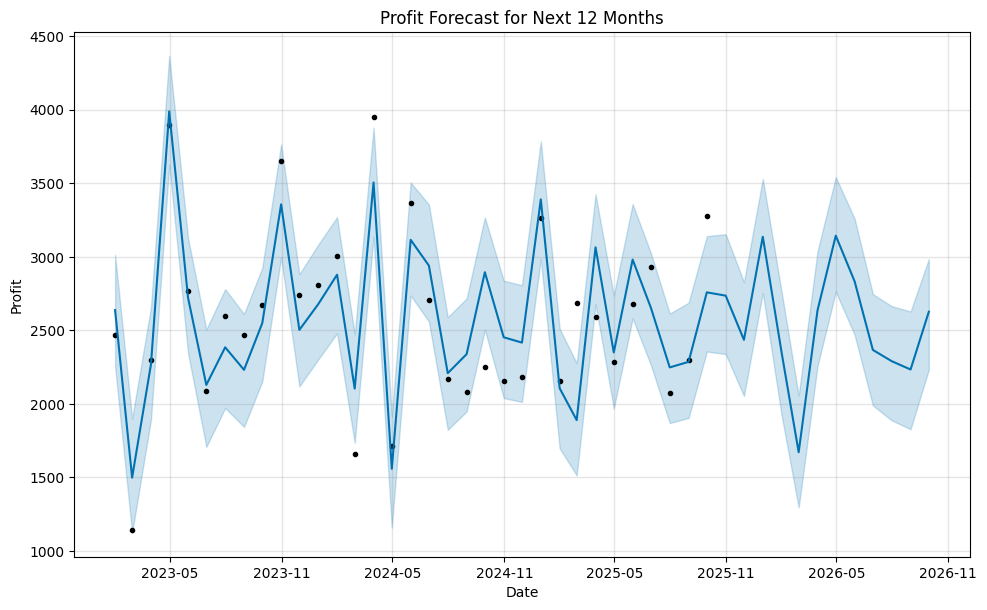

In [1]:
#Predicting Next year profit using prophet
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\appuv\Desktop\b\adidas_dataset_1200rows.csv")
df.rename(columns={"Order_Date": "ds", "Profit": "y"}, inplace=True)
df["ds"] = pd.to_datetime(df["ds"])

monthly = df.groupby(pd.Grouper(key="ds", freq="ME")).sum().reset_index()
model = Prophet()
model.fit(monthly)

future = model.make_future_dataframe(periods=12, freq="ME")
forecast = model.predict(future)

print("Orginal DataFrame:")
print(df.head())

print("\nForecast Data:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

plt.figure(figsize=(5,4))
model.plot(forecast)
plt.title("Profit Forecast for Next 12 Months")
plt.xlabel("Date")
plt.ylabel("Profit")
plt.show()

In [37]:
print("\nMonthly Aggregated Data:")
print(monthly.head(4))


Monthly Aggregated Data:
          ds  Order_ID                                                SKU  \
0 2023-01-31   3516988  AD-1132-CAD-9084-BAD-1158-AAD-9816-AAD-3409-DA...   
1 2023-02-28   2112556  AD-3290-AAD-2607-CAD-5334-BAD-3438-AAD-6261-AA...   
2 2023-03-31   3320904  AD-9727-BAD-9516-CAD-2204-AAD-1855-CAD-2797-CA...   
3 2023-04-30   4324572  AD-4264-BAD-8885-DAD-3137-CAD-7204-DAD-6507-DA...   

                                        Product_Name  \
0  Adilette SlidesNMD_R1Z.N.E. HoodieUltraboost 2...   
1  Primegreen JacketTraining CapAdicolor HoodieSu...   
2  Adicolor HoodiePrimegreen JacketTraining CapPe...   
3  Ultraboost 22Z.N.E. HoodieUltraboost LightStan...   

                                            Category  \
0  FootwearFootwearApparelFootwearAccessoriesFoot...   
1  ApparelAccessoriesApparelFootwearFootwearAcces...   
2  ApparelApparelAccessoriesAccessoriesApparelAcc...   
3  FootwearApparelFootwearFootwearFootwearApparel...   

                          

In [1]:
import pandas as pd
from sqlalchemy import create_engine
username = "postgres"
password = "appuappu"
host = "localhost"
port = "5432"
database = "MYDATABASE1"

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")
table_name = "adidas"
df = pd.read_csv(r"C:\Users\appuv\Desktop\b\adidas_dataset_1200rows.csv")
df.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"Data sucessfully loaded into table '{table_name}' in database '{database}'.")

Data sucessfully loaded into table 'adidas' in database 'MYDATABASE1'.
